In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 16 18:37:29 2023

@author: shjo9
"""
import matplotlib
# matplotlib.use('agg')
import sys
sys.path.append('C:/Users/shjo/Bridge/JNUpack/SO/libs/')
import os
import numpy as np
import xarray as xr
from eofs.xarray import Eof
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from myPlot import  figmaster,myClrbr
import cartopy.feature as cf
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter
# from eofs.standard import Eof 
NN=10
pth='J:/MDLS_OBS_OHC/Area_data/'
#ncname='GECCO_OHC_SO_c14_2000m_1980_2018.nc'
wpth='J:/MDLS_OBS_OHC/Area_data/tmp2/'
Dir_pth='EOF_IAP_ohc700m_1Y'

try:
    os.mkdir(wpth+Dir_pth)
    os.mkdir(wpth+Dir_pth+'/ppt')
except:
    pass

# CMAP=plt.get_cmap('RdYlBu_r',15)
CNN=14
fac=100
Mylim=[-0.04*fac,0.04*fac]
My_levels=np.linspace(Mylim[0], Mylim[-1], CNN+1,endpoint=True)
Mycolorlist=['#1b2c62','#1f4181','#2455a1','#3877ba','#529bd2','#71b8e4','#91d2f2','#b2e0fa','#cbebf8','#e3f4fb',\
 '#f2f9e3','#fcf0b4','#fddb81','#fdc152','#fca12f','#f8822b','#ef5e29','#e03b28','#cc1e27','#ae191f']      
Mycmap = LinearSegmentedColormap.from_list('',Mycolorlist,N=256)
CMAP = ListedColormap(Mycmap(
    np.linspace(0, 1, len(My_levels)-1,endpoint=True)) )

OHC = xr.open_mfdataset(pth+'myIAP_198001_201812_tshuv.nc').OHC700.loc[dict(lat=slice(-80,-10))]
    
OHC_2Y=OHC.rolling(time=12,center=True).mean()[6:-5]
lonR,latR=np.meshgrid(OHC_2Y.lon.values,OHC_2Y.lat.values)

#lon_m,lat_m=np.meshgrid(OHC.lon,OHC.lat)
# coslat=np.cos(np.deg2rad(lat_m)) 
# wgts=np.sqrt(coslat)[:,np.newaxis] 
# solver=Eof(OHC.OHC,weights=wgts)

solver=Eof(OHC_2Y)
eofs = -solver.eofs(neofs=NN, eofscaling=0)
pcs = -solver.pcs(npcs=NN,pcscaling=0)

var_=solver.varianceFraction(NN)
var=var_/np.sum(var_)*100

mySetting={
    'figsize': '',
    'mylabel': '',
    'Label_size':18,
    'title_loc':'right',
    'fontParams':'Arial',
    'wpth':wpth}

### Figure ==============================================================
print('!!!   figure   !!!')
F=figmaster(mySetting)

### define  ===================================================================
def Plot_SO_Merc3(lonA,latA,MyDATA,t_name,CMAP,Mylim,My_levels,w_path,save_name,fig_bool=False):
    
    Spheric=ccrs.SouthPolarStereo(central_longitude=0.0,globe=None)
    PC = ccrs.PlateCarree(central_longitude=0.0,globe=None)
    MERC=ccrs.Mercator(central_longitude=180.0,globe=None)
    PC180 = ccrs.PlateCarree(central_longitude=180.0,globe=None)

    
    # Now we will create axes object having specific projection 

    fig, ax = plt.subplots(1, 1, figsize=(12.5,6),
                       subplot_kw={'projection': PC180},dpi=200)
    gl = ax.gridlines(crs=PC, draw_labels=True,y_inline=False,x_inline=False,
                      linewidth=.6, color='k', alpha=0.45, linestyle='-.',\
                          )
    gl.xlabels_top,gl.ylabels_right = False,False
    gl.xlabel_style = gl.ylabel_style = {"size" : 20}
    
    # To plot borders and coastlines, we can use cartopy feature
    ax.add_feature(cf.COASTLINE.with_scale("110m"), lw=1,zorder=110)
    ax.add_feature(cartopy.feature.LAND,color=[.75,.75,.75],zorder=100)
    ax.set_title(t_name,loc='right',fontdict={'fontsize':24,'fontweight':'regular','fontstyle':'italic'})

    M=plt.contourf(lonA,latA,MyDATA,cmap=CMAP,levels=My_levels,transform=PC)
    # M=plt.pcolormesh(lonA, latA, MyDATA,
    #               transform=PC,cmap=CMAP)
    plt.clim(Mylim[0],Mylim[-1])
    
    # crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
    ax.set_extent([0, 360, -80, -10], crs=PC)
    ax.tick_params(axis='both', which='major', labelsize=28)

    divider = make_axes_locatable(ax)
    ax_cb = divider.new_horizontal(size="5%", pad=.1, axes_class=plt.Axes)

    fig.add_axes(ax_cb)
    cb=plt.colorbar(M,extend='both',pad=0.01,cax=ax_cb)
    cb.set_label(label='', weight='regular',fontsize=24)
    cb.ax.tick_params(labelsize=19)
    cb.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    plt.tight_layout()
    if fig_bool:
        plt.savefig(w_path+Dir_pth+'/ppt/'+save_name,
                facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
        plt.savefig(w_path+Dir_pth+'/'+save_name,bbox_inches='tight')
    plt.show()
def plot_pcs(time,time2,pc,t_name,w_path,save_name,fig_bool=True):
    Label_size = 18
    fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,
                        dpi=200)
    f1 = axs.plot(time,pc, label='KINETIC_ENRG',color='k',linewidth=2,zorder=0)
    axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
    axs.tick_params(axis='both', labelsize=Label_size)
    axs.grid(axis='x',linestyle='-.')
    xtick_location = time[5::12*4]
    xtick_labels = time2[5::12*4]
    axs.set_xticks(ticks=xtick_location)
    axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
    axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
    axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
    plt.tight_layout()
    if fig_bool:
        plt.savefig(w_path+Dir_pth+'/ppt/'+save_name,
                facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
        plt.savefig(w_path+Dir_pth+'/'+save_name,bbox_inches='tight')
    plt.show()
plt.rcParams["font.family"] = 'Arial'





c:\Users\shjo\miniconda3\envs\nemo_env\lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


!!!   figure   !!!


In [ ]:
### Plot eof ==================================================================
for i,j,n,m in zip(eofs[0:10].values*fac,np.arange(1,11),var.values,var_.values*100):
    save_name=Dir_pth+'_'+f'{j:02d}'+'mode'
    t_name='~700m '+f'{j:02d}'+' mode '+f'{n:.1f}'+'% ('+f'{m:.1f}'+'%)'
    i[i>Mylim[-1]]=Mylim[-1]
    i[i<Mylim[0]]=Mylim[0]
    # Plot_SO_Merc3(eofs.lon,eofs.lat,i,t_name,CMAP,Mylim,My_levels,wpth,save_name,fig_bool=True)
    # Plot_SO_Merc3(eofs.lon,eofs.lat,-i,t_name,CMAP,Mylim,My_levels,wpth,save_name+'_re',fig_bool=True)
    
    F.myCrtpy_sph(latR,lonR,i,CMAP,My_levels,save_name)
    F.myCrtpy_sph(latR,lonR,-i,CMAP,My_levels,save_name+'_re')
### Plot pcs ==================================================================
TIME= [str(i)[0:7] for i in pcs.time.values]
TIME2=[str(i)[2:4] for i in pcs.time.values]
w_path=wpth
for i,j,n,m in zip(pcs.values.transpose(),np.arange(1,11),var.values,var_.values*100):
    save_name='PC_'+f'{j:02d}'+'mode'
    t_name='~700m '+f'{j:02d}'+' mode '+f'{n:.1f}'+'% ('+f'{m:.1f}'+'%)'
    plot_pcs(TIME,TIME2,i,t_name,w_path,save_name,fig_bool=True)
    plot_pcs(TIME,TIME2,-i,t_name,w_path,save_name+'_re',fig_bool=True)
# IPA_2000={'eofs':eofs.values,'pcs':pcs.values,'val':var.values,'val_':var_.values}

# np.save('D:/HEAT/DATA/EOFs/EOF_IAP_2000m.npy',IPA_2000)

In [26]:
A=eofs[0:10].values*fac
i=A[1]
i[i>Mylim[-1]]=Mylim[-1]
i[i<Mylim[0]]=Mylim[0]

In [29]:
F

In [28]:
My_levels

array([-4.        , -3.42857143, -2.85714286, -2.28571429, -1.71428571,
       -1.14285714, -0.57142857,  0.        ,  0.57142857,  1.14285714,
        1.71428571,  2.28571429,  2.85714286,  3.42857143,  4.        ])

c:\Users\shjo\miniconda3\envs\nemo_env\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\shjo\miniconda3\envs\nemo_env\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


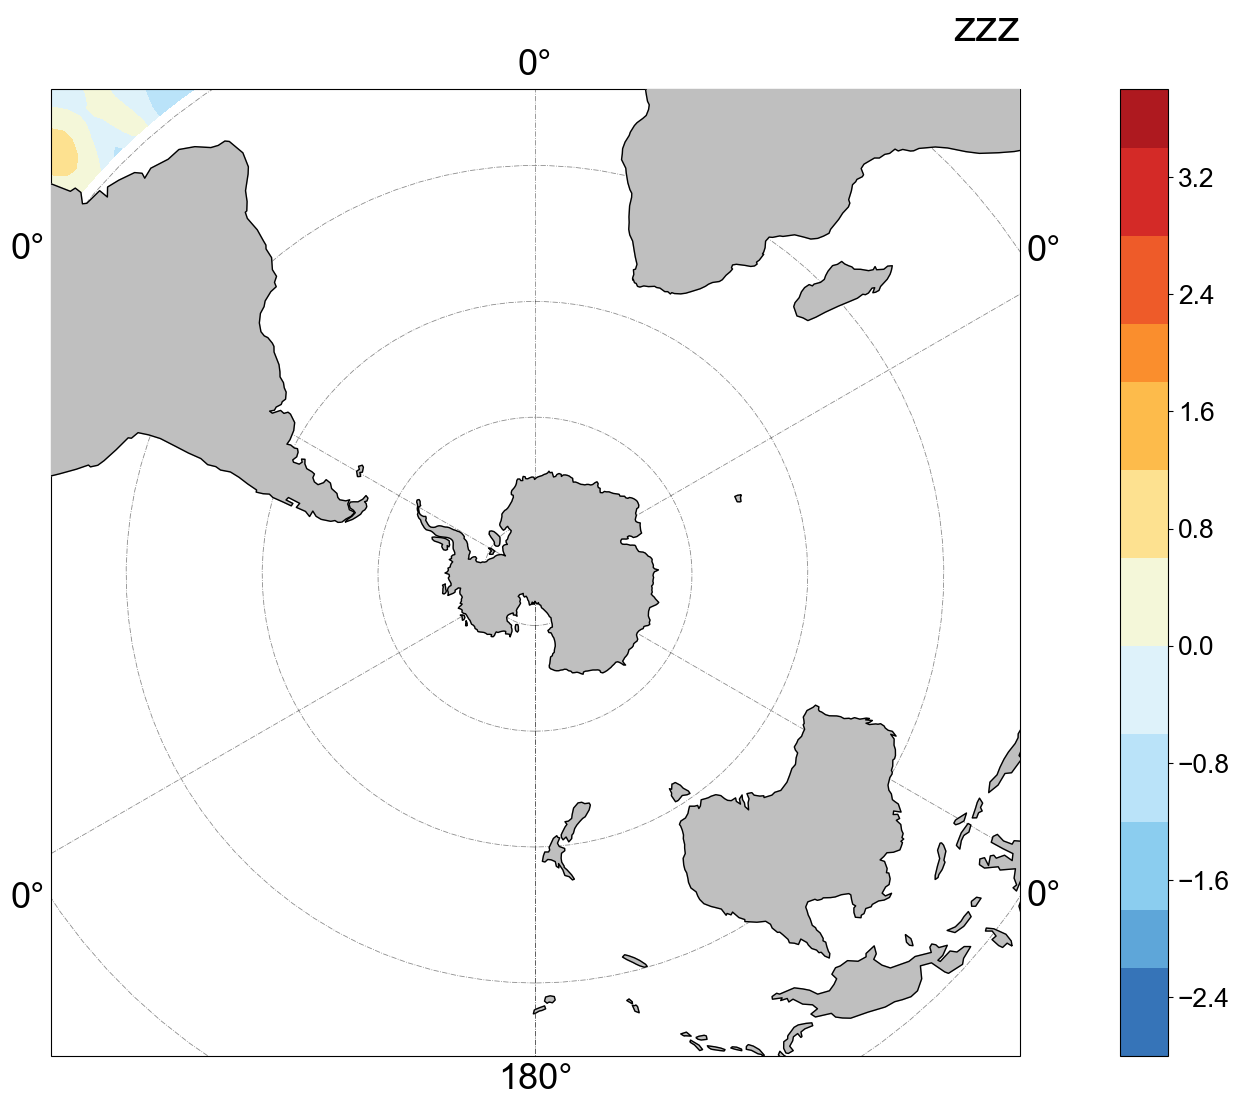

In [47]:
Spheric=ccrs.SouthPolarStereo(central_longitude=0.0,globe=None)
PC = ccrs.PlateCarree(central_longitude=0.0,globe=None)
fig, ax = plt.subplots(1, 1, figsize=(12.5,11),
                      subplot_kw={'projection': Spheric})
ax.add_feature(cf.COASTLINE.with_scale("110m"), lw=1,zorder=110)
ax.add_feature(cartopy.feature.LAND,color=[.75,.75,.75],zorder=100)
ax.set_title('zzz',loc='right',fontdict={'fontsize':32,'fontweight':'regular'})

gl = ax.gridlines(crs=PC, draw_labels=True,y_inline=False,x_inline=False,
                linewidth=.6, color='k', alpha=0.45, linestyle='-.')
gl.rotate_labels=False
gl.xlabels_top,gl.ylabels_right = True,True
gl.xlabel_style = gl.ylabel_style = {"size" : 26}

M=plt.contourf(latR,lonR,i,cmap=CMAP,levels=40,transform=PC,vmin=-4,vmax=4)

# M=plt.contourf(LON,LAT,DATA,cmap=CMAP,shading='gauround',transform=PC)

ax.set_extent([lonR[0][0], lonR[0][-1], latR[0][0], latR[-1][0]], crs=PC)

ax.tick_params(axis='both', which='major', labelsize=28)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=1., axes_class=plt.Axes)
fig.add_axes(ax_cb)
cb=plt.colorbar(M,extend='both',pad=0.08,cax=ax_cb)
cb.set_label(label='', weight='regular',fontsize=28)
cb.ax.tick_params(labelsize=19)
plt.tight_layout()


c:\Users\shjo\miniconda3\envs\nemo_env\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\shjo\miniconda3\envs\nemo_env\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\Users\shjo\miniconda3\envs\nemo_env\lib\site-packages\cartopy\mpl\geoaxes.py:873: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.set_xlim([x1, x2])
c:\Users\shjo\miniconda3\envs\nemo_env\lib\site-packages\cartopy\mpl\geoaxes.py:874: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])


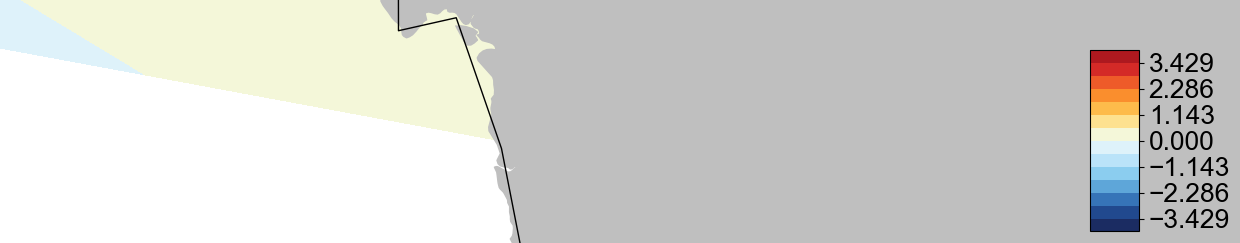

In [44]:
F.myCrtpy_sph(lonR,latR,i,CMAP,My_levels,'save_name')


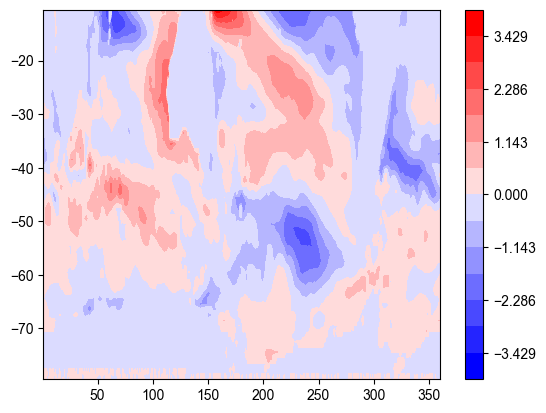

In [25]:
plt.contourf(lonR,latR,i,cmap=plt.get_cmap('bwr',15),vmin=-4,vmax=4,levels=My_levels)
plt.colorbar()

c:\Users\shjo\miniconda3\envs\nemo_env\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\shjo\miniconda3\envs\nemo_env\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


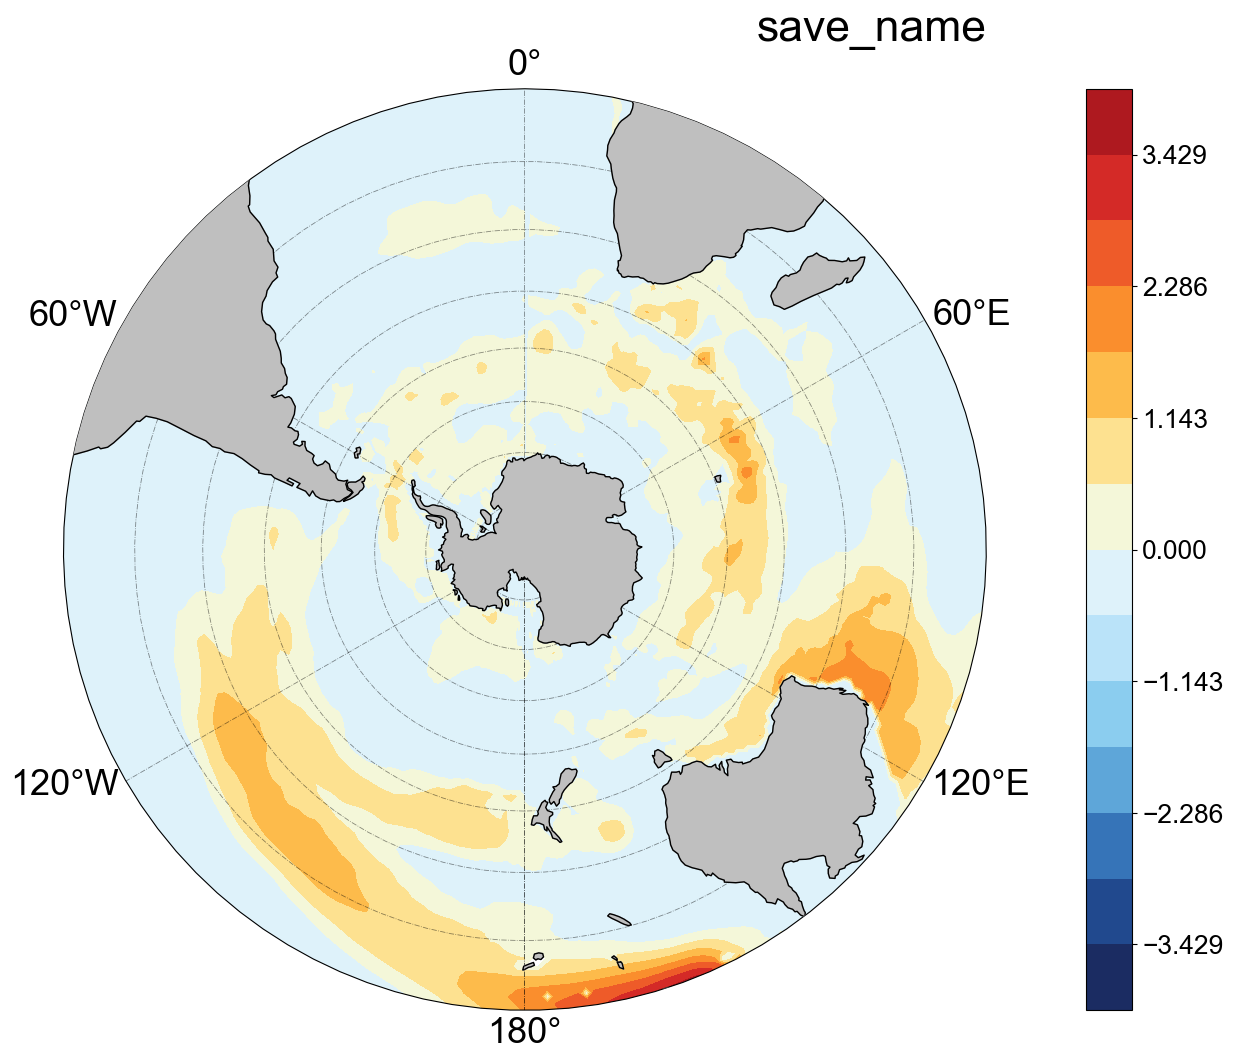

In [22]:
F.myCrtpy_sph(latR,lonR,i,CMAP,My_levels,'save_name')
